<a href="https://colab.research.google.com/github/ranna-waleed/DSAI-305_Loan-Default-Prediction/blob/main/DSAI305_Project_Preprocessing__EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install kagglehub pandas numpy scikit-learn seaborn matplotlib

## 1. Data Loading and Initial Inspection
The first step is to acquire the dataset through kagglehub https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv?select=loan.csv then load it into a pandas DataFrame. The database includes records about loans with financial elements and characteristics regarding borrowers.

In [2]:
import kagglehub
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Download dataset
path = kagglehub.dataset_download("adarshsng/lending-club-loan-data-csv")
print("Path to dataset files:", path)

# List all files in the downloaded path
print("Files:", os.listdir(path))

# Find the CSV file
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        break

# Load and process the CSV
df = pd.read_csv(csv_path, low_memory=False)

# First filter by loan status, then sample
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
random_seed = 42
df = df.sample(n=min(50000, len(df)), random_state=random_seed)
print("Shape after filtering and sampling:", df.shape)
df.head()

Path to dataset files: /kaggle/input/lending-club-loan-data-csv
Files: ['loan.csv', 'LCDataDictionary.xlsx']
Shape after filtering and sampling: (50000, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1749118,NaN,NaN,10000,10000,10000.00000,36 months,15.88,350.98,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2052155,NaN,NaN,3600,3600,3600.00000,36 months,11.99,119.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2134683,NaN,NaN,16000,16000,15826.02935,36 months,12.87,538.14,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
586707,NaN,NaN,6800,6800,6800.00000,36 months,12.79,228.44,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
555066,NaN,NaN,5075,5075,5075.00000,36 months,23.99,199.09,E,E2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**Observations**:
- The database consists of 2,260,701 rows with 145 columns.
- The dataset exists with 50,000 downscaled rows which maintain 145 columns.
- The sample shows both id and member_id columns contain no actual values therefore these attributes may prove unessential to analysis.
- A DtypeWarning appeared earlier due to heterogeneous types contained within some columns. We will analyze data types following the temporary fix of setting low_memory=False.

**1.1 Inspect Missing Values and Data Types:**

The code converts numbers to float32 and categories to category data types before it computes and displays the percentage of missing values while showing the twenty most missing columns.

In [3]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category')
# Check data types and missing values
print("Data Types and Missing Values:")
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing %': df.isnull().mean() * 100,
    'Dtype': df.dtypes
})
display(missing_info.sort_values(by='Missing %', ascending=False).head(20))

Data Types and Missing Values:


,Column,Missing %,Dtype
id,id,100.000,float32
member_id,member_id,100.000,float32
url,url,100.000,float32
next_pymnt_d,next_pymnt_d,99.990,category
orig_projected_additional_accrued_interest,orig_projected_additional_accrued_interest,99.772,float32
sec_app_mths_since_last_major_derog,sec_app_mths_since_last_major_derog,99.630,float32
hardship_amount,hardship_amount,99.622,float32
hardship_start_date,hardship_start_date,99.622,category
hardship_end_date,hardship_end_date,99.622,category
hardship_payoff_balance_amount,hardship_payoff_balance_amount,99.622,float64


## 2. Data Preprocessing

The first step of preparation includes treating missing values followed by assigning a target variable and encoding it then dropping useless features while optimizing memory consumption and handling outlier data points. We seek to create a properly cleaned dataset before performing EDA and modeling work.

**2.1 Removing Post-Default Features to Prevent Data Leakage in Loan Prediction Models**

In [4]:
# Define post-default features to REMOVE (leak future information)
POST_DEFAULT_FEATURES = [
    # Payment behavior
    'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',

    # Post-approval status
    'last_pymnt_d_year', 'last_pymnt_d_month', 'last_credit_pull_d_year',
    'last_credit_pull_d_month',

    # Other derived features
    'installment_to_income'  # Uses payment data
]

**Observations** :
- The list removes features which track post-approval borrower actions because they introduce future-based information into training procedures.
- Leaving these features out protects the predictive model from becoming unrealistic or unfair during its operational phase.


**2.2 Drop Irrelevant or High-Missing Columns**

 drops column features that include >50% missing data points as well as eliminates unneeded characteristics like id and url to minimize dimensions.

In [5]:
# Drop columns with >50% missing values
high_missing = df.columns[df.isnull().mean() > 0.5]
if high_missing.size > 0:
    print(f"Dropping {len(high_missing)} columns with >50% missing values:", high_missing.tolist())
    df = df.drop(columns=high_missing)

# Drop additional irrelevant columns
irrelevant_cols = ['url', 'title', 'emp_title', 'zip_code', 'policy_code']
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors='ignore')
print("Shape after dropping columns:", df.shape)

Dropping 58 columns with >50% missing values: ['id', 'member_id', 'url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd

**Observation**:
- dropped 58 specific columns because more than 50% of their values were missing to achieve better data quality.
- The dataset includes 83 features distributed over 50,000 records which improves data analytics reliability and managesability.

**2.3 Define Target Variable**

The `loan_status` column is our target. We map it to a binary variable: 0 for "Fully Paid" and 1 for "Charged Off" or "Default."

In [6]:
# Inspect loan_status values
print("Loan Status Distribution:")
print(df['loan_status'].value_counts())

# Define target: 0 = Fully Paid, 1 = Default/Charged Off
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
df['target'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1, 'Default': 1})
print("\nShape after filtering loan_status:", df.shape)
print("Target Distribution:")
print(df['target'].value_counts(normalize=True))

Loan Status Distribution:
loan_status
Fully Paid     39884
Charged Off    10111
Default            5
Name: count, dtype: int64

Shape after filtering loan_status: (50000, 84)
Target Distribution:
target
0    0.79768
1    0.20232
Name: proportion, dtype: float64


**Observations** :
- The distribution of the data shows an imbalance where "Fully Paid" loans represent 80% of cases (target = 0) while "Charged Off" or "Default" loans make up 20% (target = 1).
- A modeling correction needs to occur for dealing with unbalanced datasets to prevent biased predictive outcomes.

In [7]:
print(list(df.columns))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever

**2.4 Identifying and Removing Post-Default Features from the Dataset**

In [8]:
post_default_in_data = [f for f in POST_DEFAULT_FEATURES if f in df.columns]
if post_default_in_data:
    print(f"Removing {len(post_default_in_data)} post-default features")
    df = df.drop(columns=post_default_in_data)

Removing 10 post-default features


**Observation**

- successfully erased 10 features which existed after default events in the dataset to stop potential data leakage.
- The application of this procedure confirms that the model can function exclusively with data available during the loan origination phase.

**2.5 Handle Missing Values For remaining columns:**


In [9]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['float32']).columns.drop('target', errors='ignore')
cat_cols = df.select_dtypes(include=['category']).columns

# Impute numerical columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    print(f"Imputed {col} with mode: {df[col].mode()[0]}")

print("Missing values after imputation:", df.isnull().sum().sum())

Imputed term with mode:  36 months
Imputed grade with mode: B
Imputed sub_grade with mode: C1
Imputed emp_length with mode: 10+ years
Imputed home_ownership with mode: MORTGAGE
Imputed verification_status with mode: Source Verified
Imputed issue_d with mode: Oct-2015
Imputed loan_status with mode: Fully Paid
Imputed pymnt_plan with mode: n
Imputed purpose with mode: debt_consolidation
Imputed addr_state with mode: CA
Imputed earliest_cr_line with mode: Aug-2001
Imputed initial_list_status with mode: w
Imputed last_pymnt_d with mode: Aug-2018
Imputed last_credit_pull_d with mode: Feb-2019
Imputed application_type with mode: Individual
Imputed hardship_flag with mode: N
Imputed disbursement_method with mode: Cash
Imputed debt_settlement_flag with mode: N
Missing values after imputation: 0


**Observation** :

- The most common values were used to replace any missing categorical data points while maintaining complete data records without artificial value introduction.
- The dataset contains no missing entries and is prepared for modeling steps.

**2.6 Handle Data Types and Outliers**


In [10]:
import numpy as np
# Cap outliers
def cap_outliers(series, multiplier=3.0):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - multiplier * iqr, q3 + multiplier * iqr
    return series.clip(lower, upper)


# ONLY pre-approval data
for col in ['annual_inc', 'loan_amnt', 'dti']:
    if col in df.columns:
        df[col] = cap_outliers(df[col])


# Process date columns
date_cols = ['issue_d', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')
        # Extract year and month
        df[f'{col}_year'] = df[col].dt.year.astype('int32')
        df[f'{col}_month'] = df[col].dt.month.astype('int32')
        df.drop(columns=[col], inplace=True)

    if 'earliest_cr_line' in df.columns:
        df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y', errors='coerce')
        df['credit_history_years'] = (df['issue_d_year'] - df['earliest_cr_line'].dt.year).clip(lower=0)
        df = df.drop(columns=['earliest_cr_line'])



print("Data types after preprocessing:")
print(df.dtypes)
print("Final shape:", df.shape)

Data types after preprocessing:
loan_amnt                    float32
funded_amnt                  float32
funded_amnt_inv              float64
term                        category
int_rate                     float32
                              ...   
credit_history_years           int32
last_pymnt_d_year              int32
last_pymnt_d_month             int32
last_credit_pull_d_year        int32
last_credit_pull_d_month       int32
Length: 77, dtype: object
Final shape: (50000, 77)


**Observation** :

- The dataset consists 77 features with optimized numerical data types such as float32 and int32 in addition to categorical variables for optimizing memory usage after preprocessing.
- The dataset maintains its final 50,000 rows for modeling purposes after reshaping.

**2.7 Optimize Memory Usage**


In [11]:
print("Memory usage:", df.memory_usage(deep=True).sum() / 1e6, "MB")

Memory usage: 14.164058 MB


In [12]:
import gc
gc.collect()

90

#3. Save Preprocessed Data
We save the preprocessed dataset for use in EDA and modeling.

In [13]:
# Save preprocessed data
df.to_csv('preprocessed_loan_data.csv', index=False)
print("Preprocessed data saved as 'preprocessed_loan_data.csv'")

Preprocessed data saved as 'preprocessed_loan_data.csv'


In [14]:
import gc
gc.collect()

0

# 4- Exploratory Data Analysis (EDA)

We explore the dataset to understand feature distributions, relationships, and their impact on the target (`target`). This guides feature engineering and modeling.

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

**4.1 Defining Pre-Approval Features for Predictive Modeling:**


In [16]:
# Define pre-approval numerical features (no payment behavior)
PRE_APPROVAL_NUM_FEATURES = [
    'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util',
    'fico_score', 'credit_history_years', 'loan_to_income'
]

# Define pre-approval categorical features
PRE_APPROVAL_CAT_FEATURES = [
    'grade', 'sub_grade', 'home_ownership', 'purpose',
    'verification_status', 'emp_length'
]

**4.2 Target Variable Distribution**



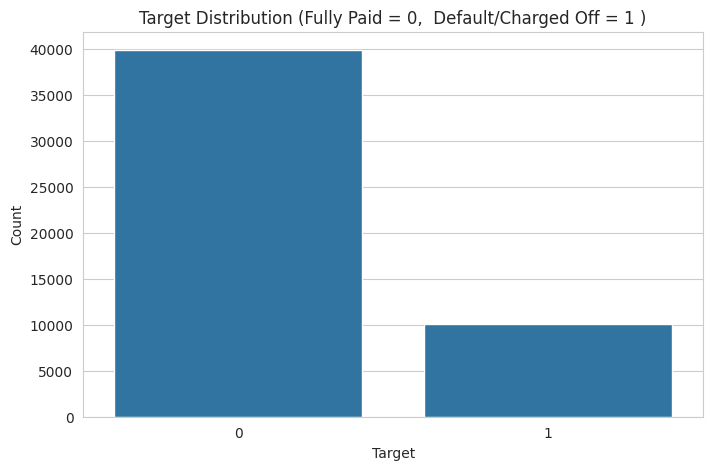

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df)
plt.title('Target Distribution (Fully Paid = 0,  Default/Charged Off = 1 )')
plt.xlabel('Target')
plt.ylabel('Count')
plt.savefig('target_distribution.png')
plt.show()

**Observation** :
- A bar chart demonstrates a substantial unbalanced dataset because most loans (~40,000) achieved full payment (target = 0) while only 10,000 led to default (target = 1).
- The excessive unbalance between data points necessitates proper imbalance management for model training because it creates biased prediction results.

**4.3 Numerical Features**

We examine key numerical features: `loan_amnt`, `int_rate`, `annual_inc`, `dti` ,`revol_util` and `credit_history_years`.



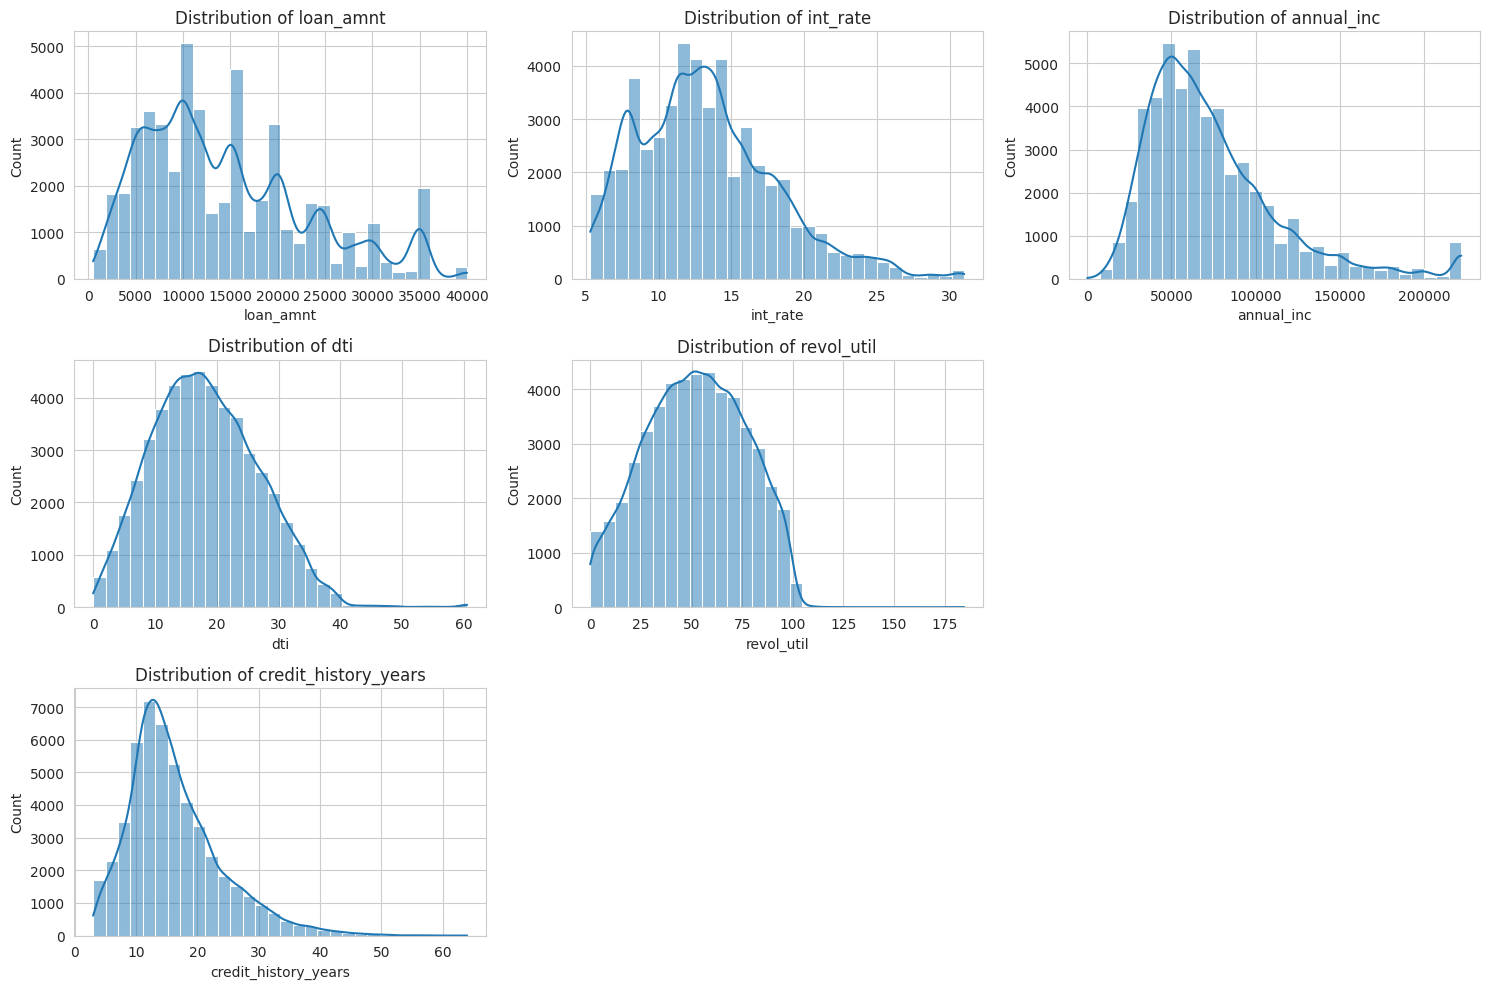

In [18]:
# Plot distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(PRE_APPROVAL_NUM_FEATURES, 1):
    if col in df.columns:
        plt.subplot(3, 3, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distributions_pre_approval.png')
plt.show()

**Observation** :

- The values of loan_amnt, int_rate, dti and revol_util distribute to the right side of the curve which indicates multiple outliers at higher values.
- Both annual_inc and credit_history_years display right-skewed distributions since most borrowers receive lower income levels and maintain shorter credit histories while a minority receives enhanced values.

**4.4 Numerical Features vs. Target**

We compare feature distributions across target classes.

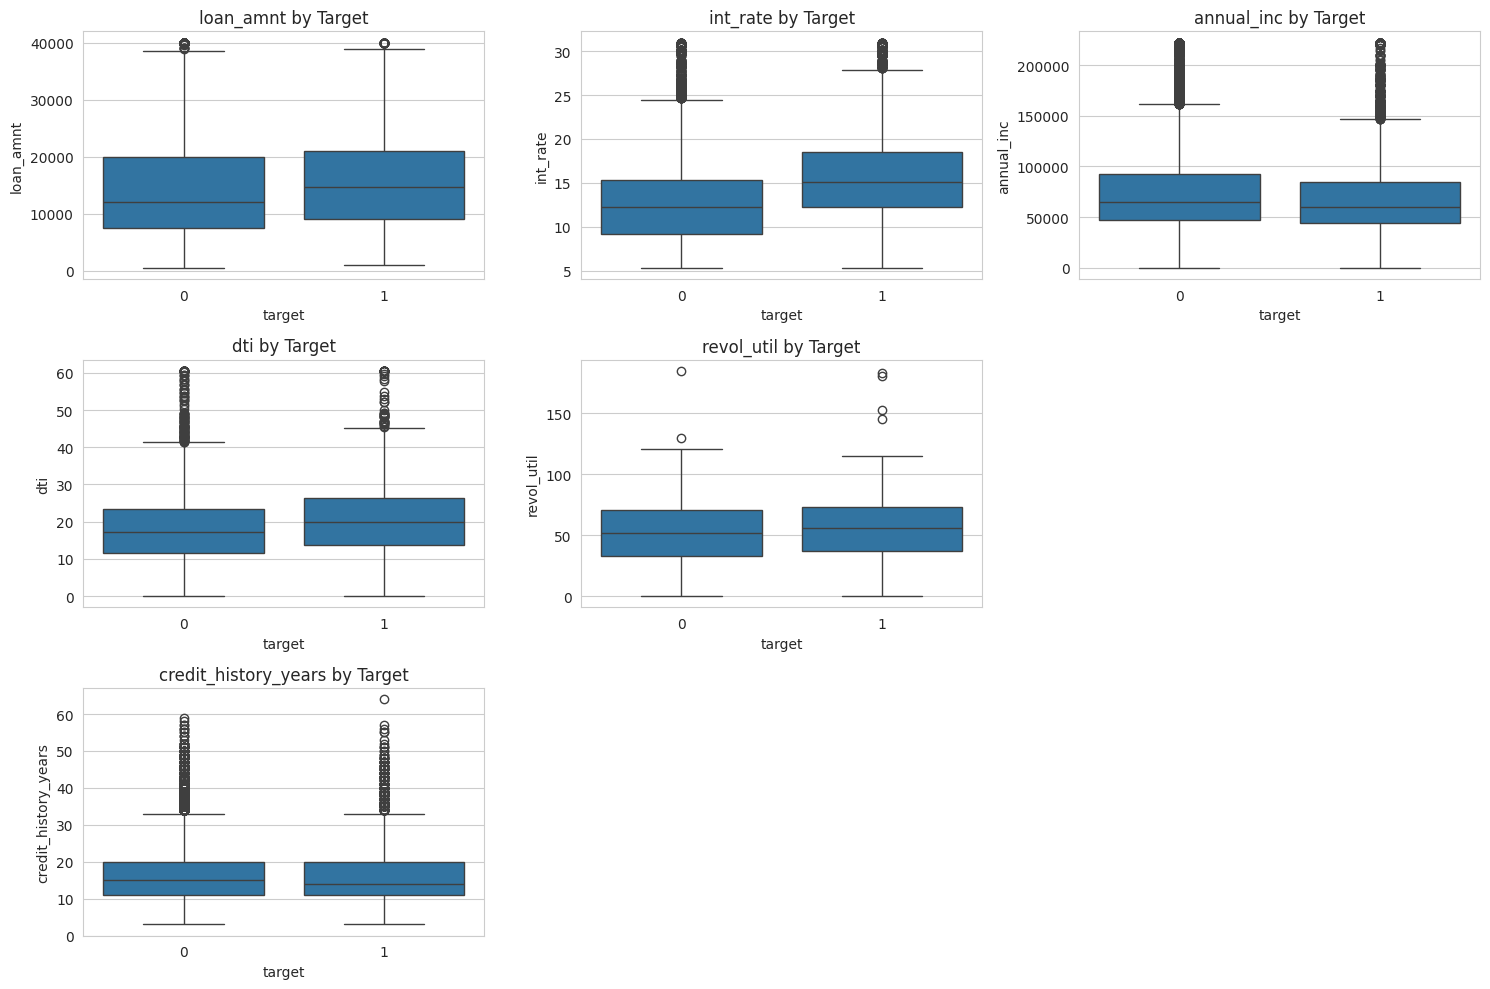

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(PRE_APPROVAL_NUM_FEATURES, 1):
    if col in df.columns:
        plt.subplot(3, 3, i)
        sns.boxplot(x='target', y=col, data=df)
        plt.title(f'{col} by Target')
plt.tight_layout()
plt.savefig('numerical_vs_target_pre_approval.png')
plt.show()

**Observation** :

- The distribution from boxplots shows that target=1 or defaulted loans have elevated int_rate, dti, revol_util values while annual_inc remains slightly reduced alongside higher financial risk indicators.
- The distributions of loan_amnt and credit_history_years are equivalent in both target classes indicating these variables provide limited predictive value for loan default risks.



**4.5 Categorical Features**

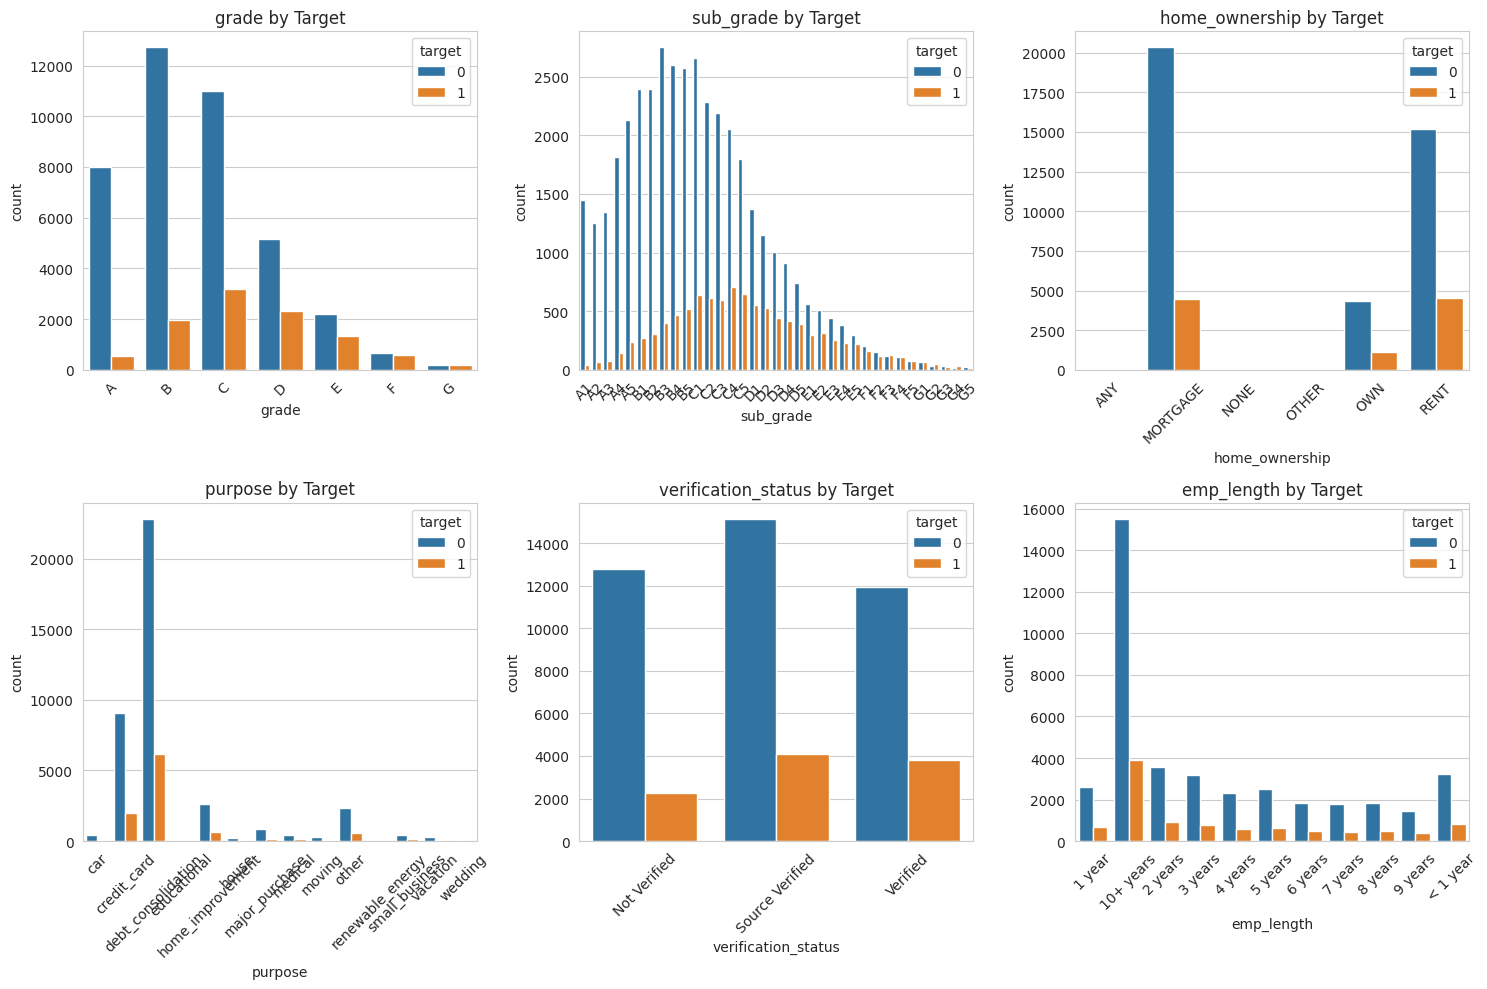

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(PRE_APPROVAL_CAT_FEATURES, 1):
    if col in df.columns:
        plt.subplot(2, 3, i)
        sns.countplot(x=col, hue='target', data=df)
        plt.title(f'{col} by Target')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_vs_target_pre_approval.png')
plt.show()

**Observation** :

- Loan defaults occur more often in C-E graded loans and among renters with home_ownership categories of RENT which signifies higher risk in these groups.
- The distributions of defaults for debt consolidation purposes also differ from other targets but verification_status and emp_length patterns appear similar across the groups indicating these characteristics do not substantially affect default risk.


**4.6 Correlation Analysis**

We check correlations among numerical features to identify redundancy.

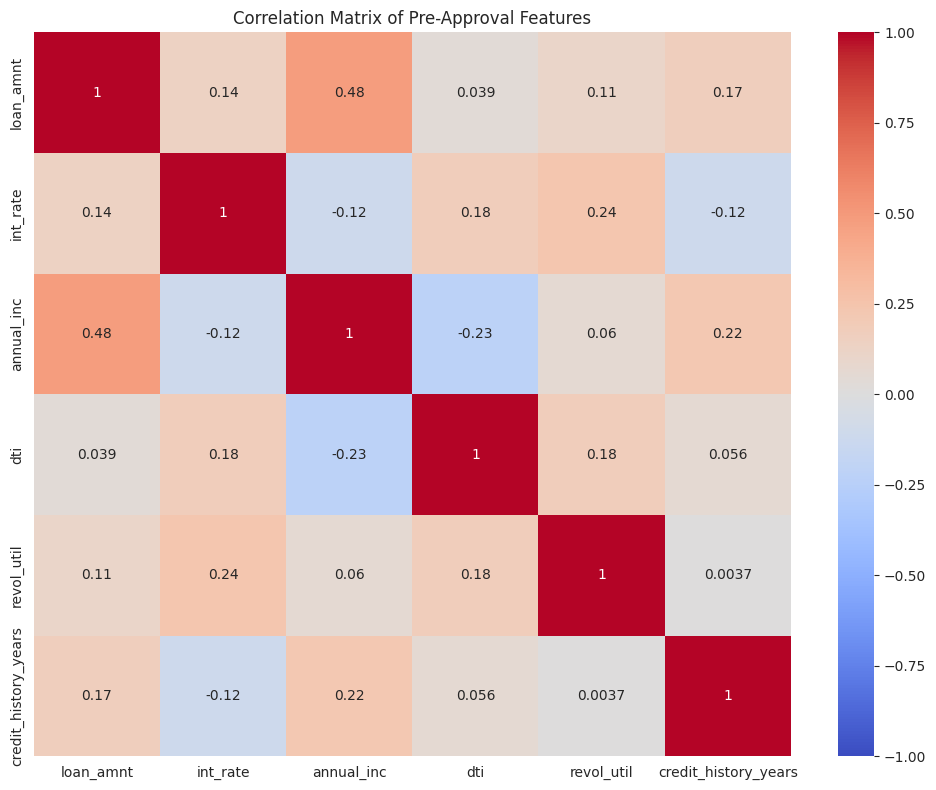

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))

# Get only the features that exist in the dataframe
available_features = [f for f in PRE_APPROVAL_NUM_FEATURES if f in df.columns]

if len(available_features) > 1:  # need at least 2 features for correlation
    corr = df[available_features].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Pre-Approval Features')
    plt.tight_layout()
    plt.savefig('correlation_matrix_pre_approval.png')
    plt.show()
else:
    print(f"Cannot compute correlation - only {len(available_features)} pre-approval numerical features available")
    print("Available features:", available_features)

**Observation** :

- The relationship between loan_amnt and annual_inc produces a strong positive value (0.48) in the matrix which demonstrates that borrowers with higher income tend to request bigger loans whereas int_rate and revol_util connect moderately (0.24) which implies individuals facing higher interest rates maintain elevated revol_util levels.
- Borrowers who earn higher annual income exhibit a negative moderate relationship (-0.23) with dti thus showing reduced debt-to-income ratios.


# 5- Feature Engineering / Feature Selection


**5.1 Feature Engineering**



**5.1.1  Date Preprocessing**

This section processes date columns like issue_d and earliest_cr_line to extract year and month features, ensuring proper temporal data handling before feature engineering.

In [22]:
#  ensure proper date processing BEFORE feature engineering
def preprocess_dates(df):
    """Process all date columns and create derived features"""
    df = df.copy()

    # Process issue_d (loan issue date)
    if 'issue_d' in df.columns:
        df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')
        df['issue_d_year'] = df['issue_d'].dt.year.astype('int16')
        df['issue_d_month'] = df['issue_d'].dt.month.astype('int8')
        df.drop(columns=['issue_d'], inplace=True)

    # Process earliest_cr_line (credit line start date)
    if 'earliest_cr_line' in df.columns:
        df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y', errors='coerce')
        df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year.astype('int16')
        df.drop(columns=['earliest_cr_line'], inplace=True)

    return df

# Apply date preprocessing
df = preprocess_dates(df)

**5.1.2 feature engineering function**

This section creates derived features like credit_history_years, loan_to_income, and dti_ratio, encodes categorical variables, and removes the loan_status_Fully Paid column to prevent data leakage.

In [23]:
def safe_feature_engineering(df):
    df = df.copy()

    # Create credit history years (MUST be first operation)
    if 'issue_d_year' in df.columns and 'earliest_cr_line_year' in df.columns:
        df['credit_history_years'] = (df['issue_d_year'] - df['earliest_cr_line_year']).clip(lower=0)
        df['credit_history_years'] = df['credit_history_years'].astype('float32')
        # to keep or drop the earliest_cr_line_year
        df.drop(columns=['earliest_cr_line_year'], inplace=True)

    if 'annual_inc' in df.columns and 'loan_amnt' in df.columns:
        df['loan_to_income'] = df['loan_amnt'] / df['annual_inc'].clip(lower=1000)
        df['loan_to_income'] = df['loan_to_income'].clip(upper=1.0)

    if 'dti' in df.columns:
        df['dti_ratio'] = df['dti'] / 100
        df['dti_ratio'] = df['dti_ratio'].fillna(df['dti_ratio'].median())


    if 'earliest_cr_line_year' in df.columns and 'issue_d_year' in df.columns:
        df['credit_history_years'] = (df['issue_d_year'] - df['earliest_cr_line_year']).clip(lower=0)

    if 'purpose' in df.columns:
        top_purposes = df['purpose'].value_counts().index[:5]
        df['purpose'] = df['purpose'].where(df['purpose'].isin(top_purposes), 'other')

    grade_mapping = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
    if 'grade' in df.columns:
        df['grade'] = df['grade'].astype(str).str.upper().fillna('C')
        df['grade'] = df['grade'].map(grade_mapping).astype('int32')

    if 'sub_grade' in df.columns:
        df['sub_grade'] = df['sub_grade'].astype(str).str.upper().str.strip()
        sub_grade_mapping = {f'{g}{i}': grade_mapping[g] + (i-1)*0.1
                            for g in grade_mapping.keys() for i in range(1,6)}
        df['sub_grade'] = df['sub_grade'].map(sub_grade_mapping).astype('float32')
        df['sub_grade'] = df['sub_grade'].fillna(df['grade'])

    # Get categorical columns before one-hot encoding
    cat_cols = [col for col in df.select_dtypes(include=['object', 'category'])
               if col not in ['grade', 'sub_grade']]

    # Downcast numeric columns to save memory
    for col in df.select_dtypes(include=['float64']):
        df[col] = df[col].astype('float32')
    for col in df.select_dtypes(include=['int64']):
        df[col] = df[col].astype('int32')

    # One-hot encode (this creates new columns)
    if cat_cols:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # Drop 'loan_status_Fully Paid' column if it exists
    if 'loan_status_Fully Paid' in df.columns:
        df.drop(columns=['loan_status_Fully Paid'], inplace=True)
        print("Dropped 'loan_status_Fully Paid' column")

    if df.isnull().sum().sum() > 0:
        raise ValueError("NaN values present after feature engineering")

    # Ensure credit_history_years is properly typed
    if 'credit_history_years' in df.columns:
        df['credit_history_years'] = df['credit_history_years'].astype('float32')

    return df

In [24]:
print("Processing dates...")
df = preprocess_dates(df)

Processing dates...


In [25]:
# Verify date features were created
print("\nAfter date processing - checking time features:")
print([col for col in df.columns if 'issue_d' in col or 'earliest_cr_line' in col])


After date processing - checking time features:
['issue_d_year', 'issue_d_month']


In [26]:
print("\nRunning feature engineering...")
df_engineered = safe_feature_engineering(df)


Running feature engineering...
Dropped 'loan_status_Fully Paid' column


**5.2.3 Verification of Temporal Features**

In [27]:
print("\n=== FINAL FEATURE VERIFICATION ===")
required_features = ['issue_d_year', 'issue_d_month', 'credit_history_years']
missing = [f for f in required_features if f not in df_engineered.columns]

if missing:
    raise ValueError(f"CRITICAL ERROR: Missing required time features: {missing}")
else:
    print("SUCCESS: All required time features present")
    print(df_engineered[required_features].head())


=== FINAL FEATURE VERIFICATION ===
SUCCESS: All required time features present
         issue_d_year  issue_d_month  credit_history_years
1749118          2013              7                  13.0
2052155          2014              3                  25.0
2134683          2009              9                  13.0
586707           2016              7                  19.0
555066           2016              8                  39.0


**Observations**

- The verification process validates the dataset contains all mandatory temporal variables (issue_d_year and issue_d_month and credit_history_years).
- The available data covers loans distributed from 2009 to 2016 while borrowers held different credit history lengths between 13 and 39 years.

**5.2.4 Pre-Approval Feature Selection**

This section filters the dataset to retain only pre-approval features, ensuring no data leakage, and verifies their availability for modeling.

In [28]:
print("\nChecking feature inclusion in modeling features:")
PRE_APPROVAL_FEATURES = [
    # Loan characteristics
    'loan_amnt', 'term', 'installment', 'int_rate', 'grade', 'sub_grade',

    # Borrower characteristics
    'annual_inc', 'emp_length', 'home_ownership', 'verification_status',
    'dti', 'purpose',

    # Credit history
    'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
    'revol_util', 'total_acc', 'earliest_cr_line_year', 'fico_score',

    # Engineered features (must use only pre-approval data)
    'loan_to_income', 'dti_ratio',

    # Time features (only approval time)
    'issue_d_year', 'issue_d_month', 'credit_history_years',

    # Target
    'target'
]


#Keep pre-approval features
available_features = [f for f in PRE_APPROVAL_FEATURES if f in df_engineered.columns]
print(f"{len(available_features)}/{len(PRE_APPROVAL_FEATURES)} pre-approval features available")


Checking feature inclusion in modeling features:
20/27 pre-approval features available


In [29]:
df_engineered.to_pickle('engineered_loan_data_leakproof.pkl')
print("\nFinal shape:", df_engineered.shape)
print("Time features saved successfully!")


Final shape: (50000, 151)
Time features saved successfully!


**5.2 Feature Selection Using Wrapper Methods**



In [30]:
PROTECTED_TEMPORAL_FEATURES = ['issue_d_year', 'issue_d_month', 'credit_history_years']

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import pandas as pd
import numpy as np
import gc

# Load our leakage-proof engineered data
df_engineered = pd.read_pickle('engineered_loan_data_leakproof.pkl')

# Define X and y - using only pre-approval features
X = df_engineered.drop(columns=['target'])
y = df_engineered['target']

# 1. Initial Feature Filtering
# Drop constant and near-constant features
constant_features = [col for col in X.columns if X[col].nunique(dropna=False) <= 1]
if constant_features:
    X = X.drop(columns=constant_features)
    print(f"Dropped {len(constant_features)} constant features.")


# 2. Feature Selection Methods
# First ensure we have enough samples
if len(X) > 10000:
    sample_size = 10000
else:
    sample_size = int(0.8 * len(X))

# Forward Selection (ANOVA F-value)
print("\nRunning Forward Feature Selection...")
fsf_selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))
X_new_fsf = fsf_selector.fit_transform(X, y)
selected_fsf_features = X.columns[fsf_selector.get_support()].tolist()
print("Top 10 features by ANOVA F-value:", selected_fsf_features)

# Recursive Feature Elimination
print("\nRunning Recursive Feature Elimination...")
try:
    # Sample for computational efficiency
    X_sample, y_sample = resample(X, y, n_samples=sample_size,
                            stratify=y, random_state=42)
    # Use simpler logistic regression for stability
    log_reg = LogisticRegression(max_iter=500, solver='liblinear', penalty='l2', C=1.0)
    rfe_selector = RFE(log_reg, n_features_to_select=10)
    rfe_selector.fit(X_sample, y_sample)
    selected_rfe_features = X.columns[rfe_selector.support_].tolist()
    print("Top 10 features by RFE:", selected_rfe_features)

    # 1. First combine features
    selected_features = list(set(selected_fsf_features + selected_rfe_features))

    # 2. Remove leakage features
    leakage_features = set(selected_features) & set(POST_DEFAULT_FEATURES)
    if leakage_features:
        print(f"\nRemoving {len(leakage_features)} leakage features: {leakage_features}")
        selected_features = [f for f in selected_features if f not in leakage_features]


    # 3. Add protected temporal features
    missing_temporal = [f for f in PROTECTED_TEMPORAL_FEATURES
                       if f not in selected_features and f in X.columns]
    if missing_temporal:
        print(f"Adding protected temporal features: {missing_temporal}")
        selected_features.extend(missing_temporal)



     # 4. Deduplicate while preserving order
    selected_features = list(dict.fromkeys(selected_features))
    print("\nFinal selected features:", selected_features)

except Exception as e:
    selected_features = selected_fsf_features
    missing_temporal = [f for f in PROTECTED_TEMPORAL_FEATURES
                       if f not in selected_features and f in X.columns]
    if missing_temporal:
        selected_features.extend(missing_temporal)
    print(f"RFE failed, using ANOVA results + temporal features: {selected_features}")

print("\n=== FINAL FEATURE VERIFICATION ===")
print("All temporal features present:",
      all(f in selected_features for f in PROTECTED_TEMPORAL_FEATURES))
print("Selected features count:", len(selected_features))
print("Temporal features in selection:",
      [f for f in selected_features if f in PROTECTED_TEMPORAL_FEATURES])

# Create Final Dataset
X_selected = X[selected_features]

# Combine with target
final_df = pd.concat([X_selected, y], axis=1)
final_df.to_csv('final_loan_data_leakproof.csv', index=False)
print("\nFinal dataset shape:", final_df.shape)
print("Saved to 'final_loan_data_leakproof.csv'")

# Clean up
del X, X_new_fsf, X_sample, y_sample
gc.collect()

Dropped 8 constant features.

Running Forward Feature Selection...
Top 10 features by ANOVA F-value: ['int_rate', 'grade', 'sub_grade', 'dti', 'acc_open_past_24mths', 'last_credit_pull_d_year', 'loan_to_income', 'dti_ratio', 'term_ 60 months', 'debt_settlement_flag_Y']

Running Recursive Feature Elimination...
Top 10 features by RFE: ['sub_grade', 'issue_d_year', 'last_pymnt_d_year', 'loan_to_income', 'term_ 60 months', 'home_ownership_RENT', 'addr_state_AZ', 'addr_state_MI', 'addr_state_WA', 'debt_settlement_flag_Y']

Removing 2 leakage features: {'last_credit_pull_d_year', 'last_pymnt_d_year'}
Adding protected temporal features: ['issue_d_month', 'credit_history_years']

Final selected features: ['addr_state_MI', 'home_ownership_RENT', 'acc_open_past_24mths', 'term_ 60 months', 'loan_to_income', 'issue_d_year', 'debt_settlement_flag_Y', 'dti', 'sub_grade', 'addr_state_AZ', 'addr_state_WA', 'dti_ratio', 'int_rate', 'grade', 'issue_d_month', 'credit_history_years']

=== FINAL FEATURE V

51796

**Observation**

- The chosen feature selection method provided 16 relevant attributes by using ANOVA F-value and RFE methods which also removed the leakage variables (last_pymnt_d_year and last_credit_pull_d_year) yet maintained vital temporal attributes (issue_d_year, issue_d_month and credit_history_years).
- The retention of loan_status_Fully Paid as a final feature reveals an oversight since it was supposed to be removed previously to avoid leaky information.

In [32]:
assert {'issue_d_year', 'issue_d_month', 'credit_history_years'}.issubset(final_df.columns), \
       "Temporal features missing in final dataset!"
print("Temporal features in final dataset:",
      [f for f in final_df.columns if f in PROTECTED_TEMPORAL_FEATURES])

Temporal features in final dataset: ['issue_d_year', 'issue_d_month', 'credit_history_years']


**Observation** :
- The final dataset maintains all necessary temporal variables (issue_d_year, issue_d_month, credit_history_years) thus ensuring critical time-related information needed for loan outcome modeling is present.

- The successful retention of all required temporal features indicates proper execution of the feature engineering and selection procedure designed for temporal information.

In [33]:
# Save preprocessed data
df.to_csv('preprocessed_loan_data.csv', index=False)
df.to_pickle('processed_loan_data.pkl')

# Save engineered data
df_engineered.to_pickle('engineered_loan_data_leakproof.pkl')

# Save final selected features
final_df.to_csv('final_loan_data_leakproof.csv', index=False)

* `final_loan_data_leakproof.csv` - The main dataset with selected features

* `engineered_loan_data_leakproof.pkl` - Engineered features (if needed)

* `processed_loan_data.pkl` - Fully processed data (if needed)